In [147]:
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
import graphviz

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

df = pd.read_csv('diabetes.csv', header=None, names=col_names)

In [148]:
df = df.iloc[1::,]

In [149]:
df.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [150]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']

X = df[feature_cols]
y = df.label

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=42)

In [194]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42, min_samples_leaf=5)
model.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=42)

In [195]:
y_pred = model.predict(X_test)

In [196]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7434944237918215


In [197]:
from sklearn.tree import export_graphviz
from six import StringIO   
from IPython.display import Image  
import pydotplus


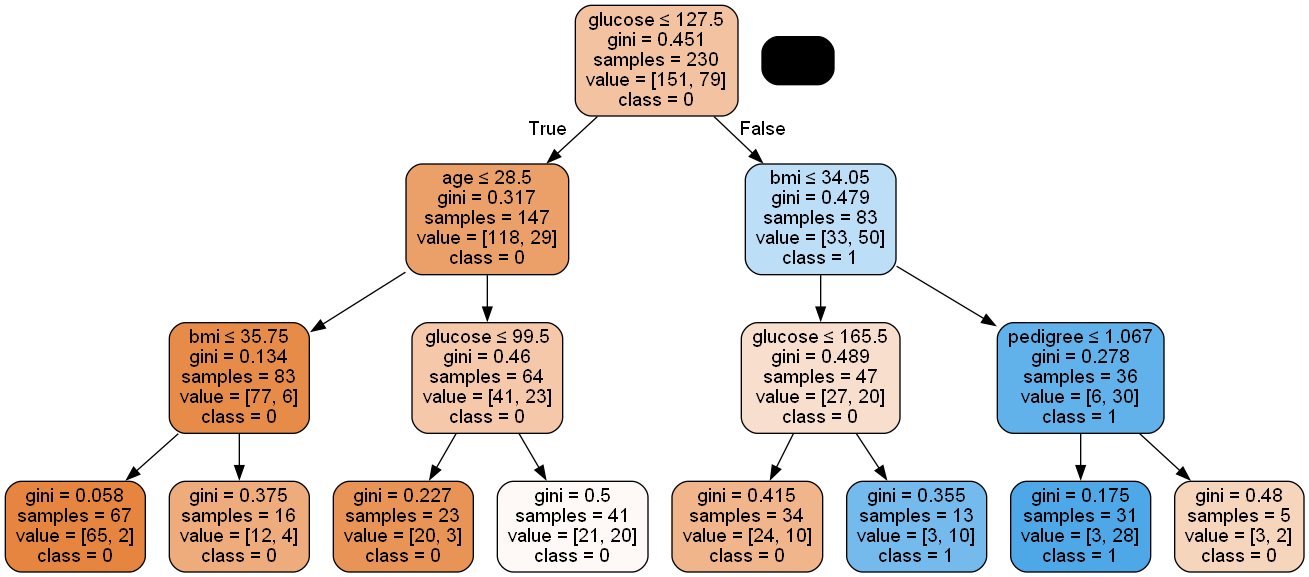

In [198]:
dot_data = StringIO()
export_graphviz(model, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = feature_cols, 
                class_names=['0', '1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

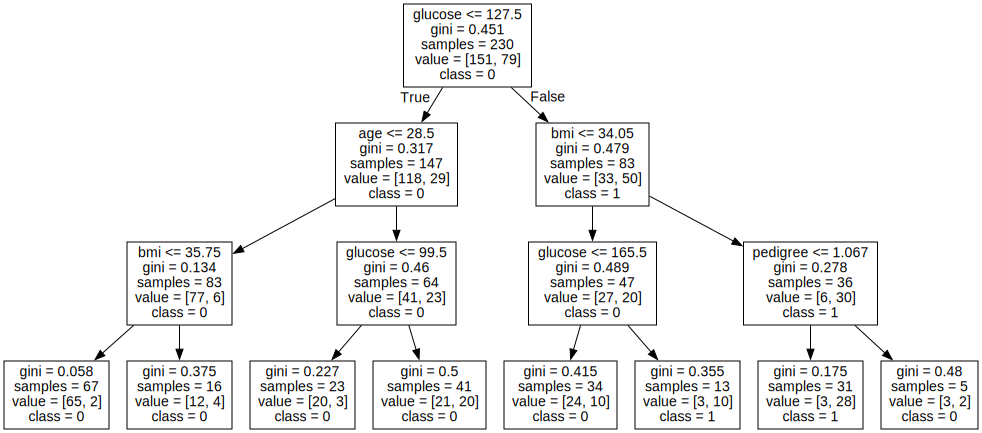

In [199]:
target = np.unique(y).astype('str')
feature_names = feature_cols

dot_data1 = tree.export_graphviz(model, feature_names=feature_names, class_names=target)
graph = graphviz.Source(dot_data1)
graph